In [67]:
import numpy as np
import matplotlib.pyplot as plt


# 1(a)

In [68]:
def plot_unit_norm_ball(p):

    x = np.linspace(-1, 1, 500)
    y = np.linspace(-1, 1, 500)
    X, Y = np.meshgrid(x, y)

    norm_p = (np.abs(X)**p + np.abs(Y)**p)**(1/p)

    mask = norm_p <= 1

    plt.figure(figsize=(8, 8))
    plt.contourf(X, Y, mask, colors=['white', 'skyblue'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Unit Norm Ball for p = {p}')
    plt.grid(True)
    plt.show()

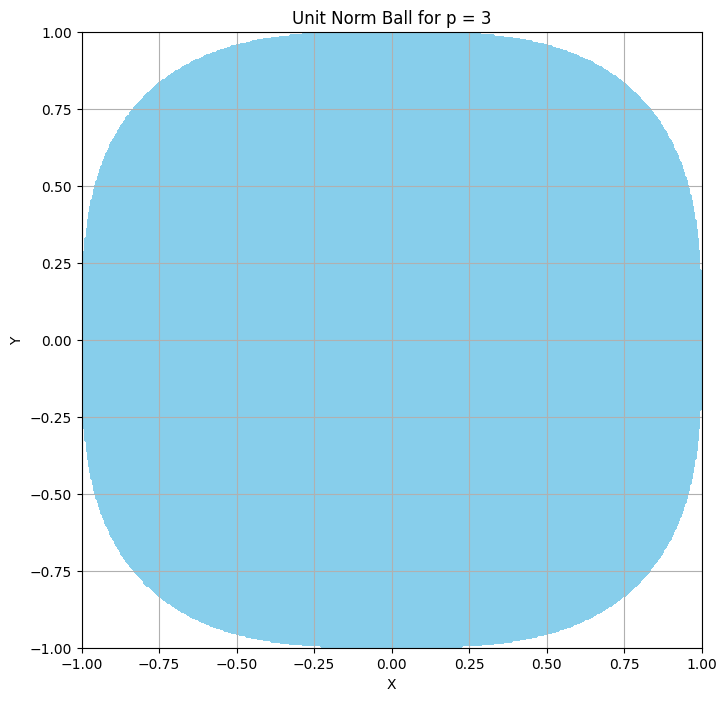

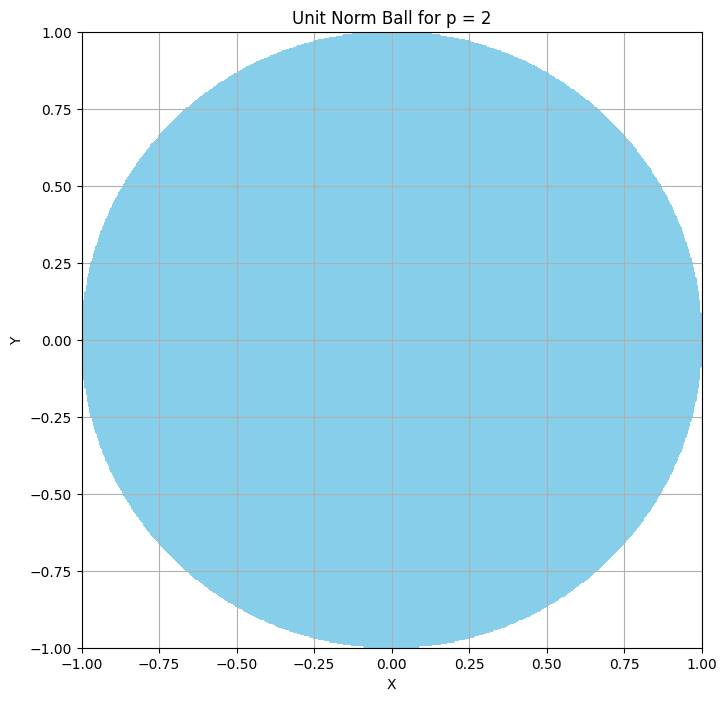

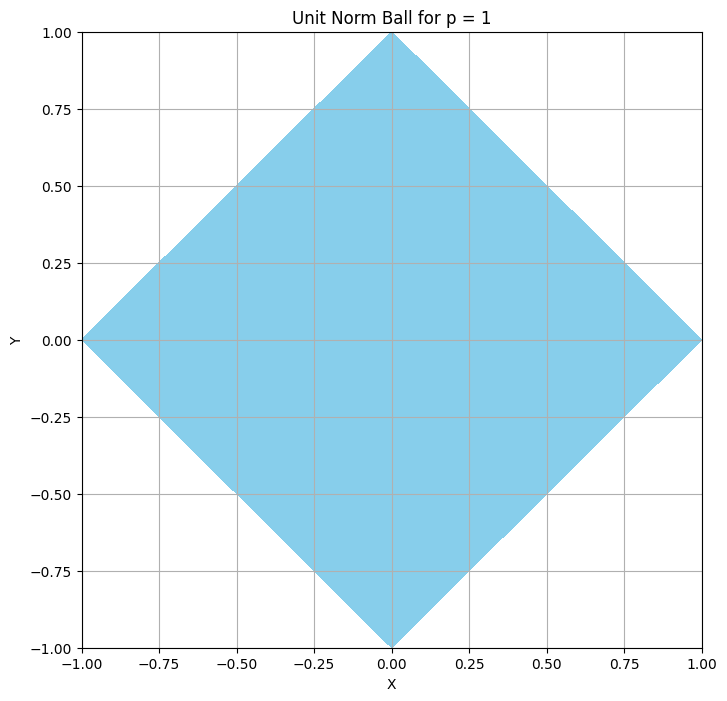

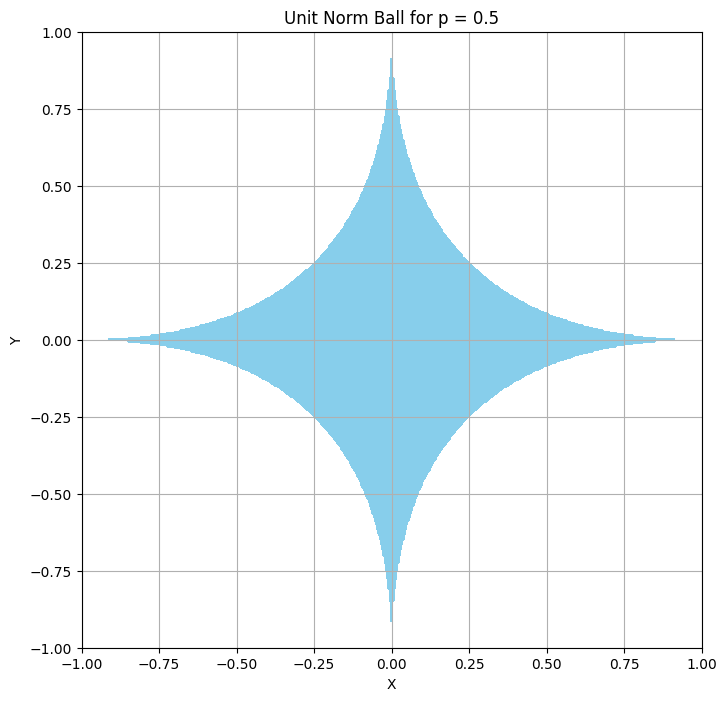

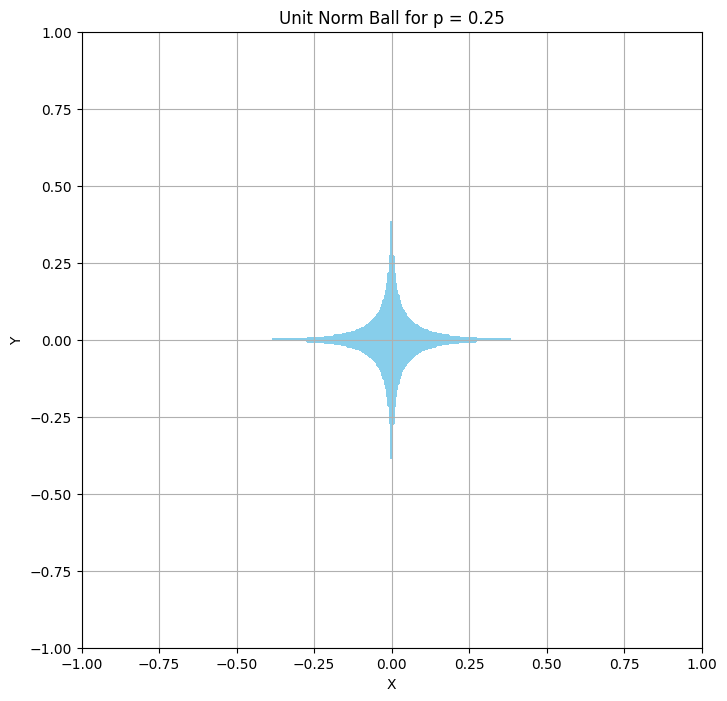

In [69]:
# Integer p ≥ 1
plot_unit_norm_ball(3)
plot_unit_norm_ball(2)
plot_unit_norm_ball(1)
# 0 < p < 1
plot_unit_norm_ball(0.5)
plot_unit_norm_ball(0.25)

# 1(b)

In [70]:
def non_convexity(p):

    x = np.linspace(-1, 1, 500)
    y = np.linspace(-1, 1, 500)
    X, Y = np.meshgrid(x, y)

    norm_p = (np.abs(X)**p + np.abs(Y)**p)**(1/p)

    mask = norm_p <= 1

    plt.figure(figsize=(8, 8))
    plt.contourf(X, Y, mask, colors=['white', 'skyblue'])
    plt.plot([0, 0.5], [0.75, 0], color='red', linewidth=2, label='Convex Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Unit Norm Ball for p = {p}')
    plt.grid(True)
    plt.show()

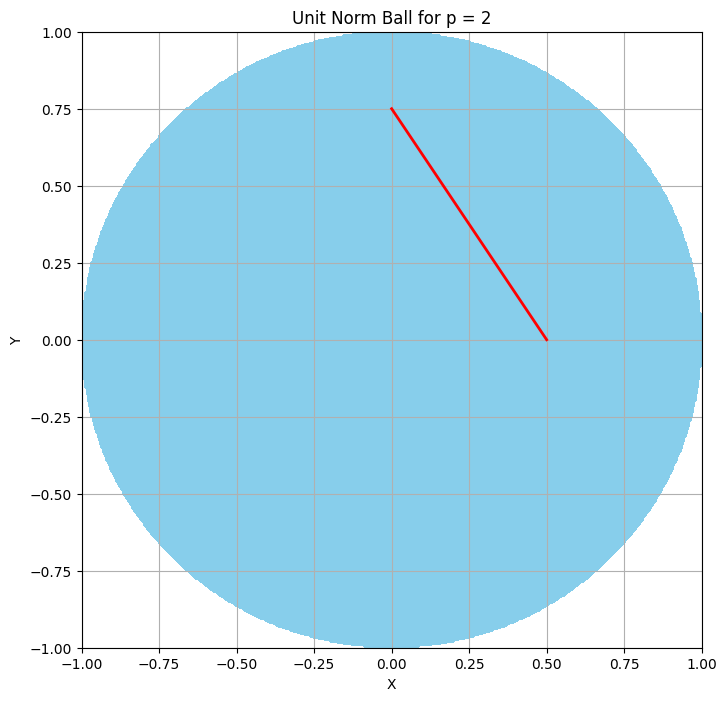

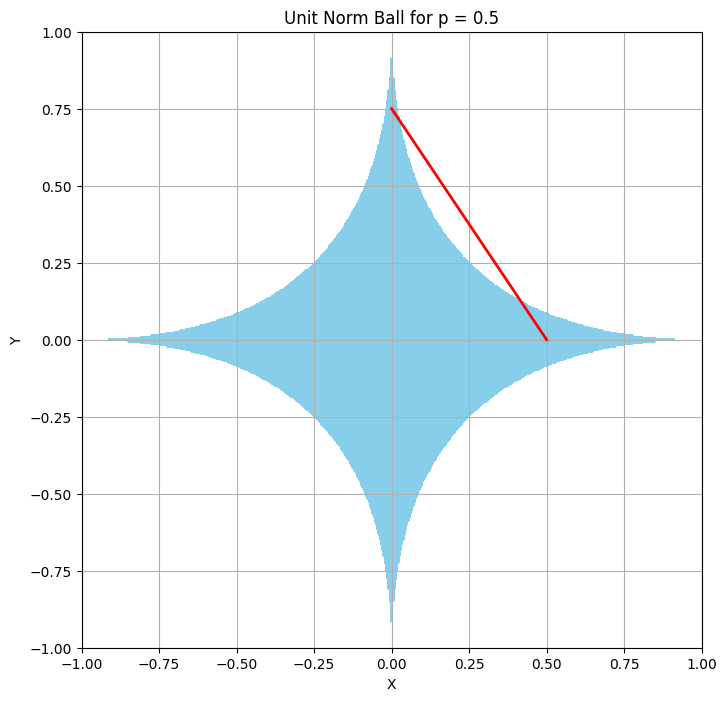

In [71]:
non_convexity(2)
non_convexity(0.5)


It is clear that for integer p ≥ 1 the unit norm ball is convex.
For integer p ≥ 1, the shape remains smooth and convex, while for 0 < p < 1,
the unit norm ball is not convex as the plot shows a line segment connecting two points within a shape that doen't lie entirely within that shape




# 2. Completeness:

Let f_n(x) be a series of functions defined on the closed interval [0,1] as n tends to infinity it converges to g(x) which is 0 for x ∈ [0, 1) and 1 for x = 1. This function g(x) is not continuous on [0, 1], so it does not belong to C[0,1].

In [72]:
def fn(x, n):
    return x**n

def g(x):
    result = np.zeros_like(x)  # Initialize an array of zeros with the same shape as x
    result[x < 1] = 0
    result[x == 1] = 1
    return result

def l1_norm(f, g, x_vals):
    return np.trapz(np.abs(f - g), x_vals)

n_values = [2, 5, 10, 20, 50, 100]
x_vals = np.arange(0, 1, 0.001)

l1_distances = []

for n in n_values:
    f = fn(x_vals, n)  # Calculate f(x) for the given n
    l1_distance = l1_norm(f, g(x_vals), x_vals)  # Calculate L1 norm between f and g
    l1_distances.append(l1_distance)

l1_distances


[0.33233449950000005,
 0.1656695783382475,
 0.08991490180131935,
 0.04663061984379958,
 0.01863640682649813,
 0.008956926011585074]

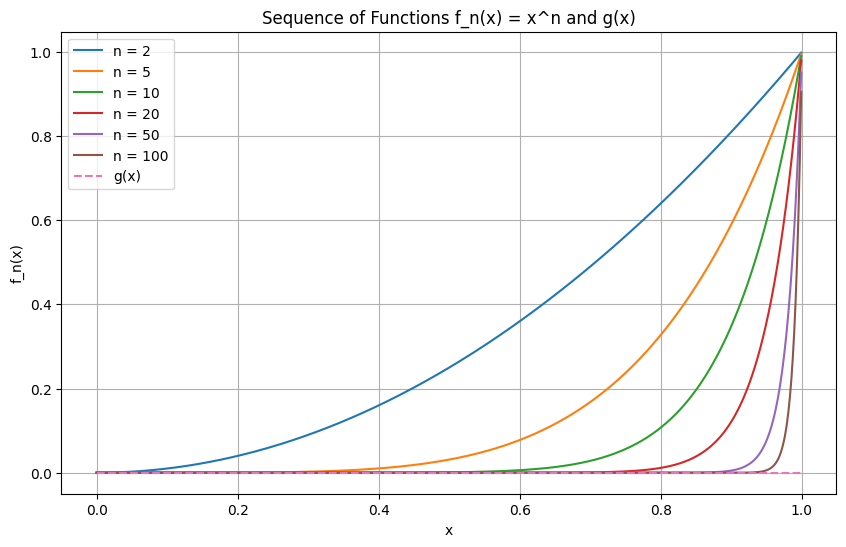

In [73]:
x_vals = np.arange(0, 1, 0.001)
plt.figure(figsize=(10, 6))

for n in n_values:
    f_n = x_vals**n
    plt.plot(x_vals, f_n, label=f'n = {n}')

g_values = [g(x) for x in x_vals]
plt.plot(x_vals, g_values, label='g(x)', linestyle='--')

plt.title("Sequence of Functions f_n(x) = x^n and g(x)")
plt.xlabel("x")
plt.ylabel("f_n(x)")
plt.legend()
plt.grid()
plt.show()



L1 distance between f_n(x) and g(x) decreases with increase in n but it never reaches zero. Hence, the sequence f_n(x) does not converge to g(x) with respect to L1 norm.

3. Entropy of a discrete RV:

# 3(a)

In [74]:
def entropy(pmf):
    entropy_val = 0

    for p in pmf:
        if p > 0:
            entropy_val += p * np.log2(p)

    return -entropy_val

# 3(b)

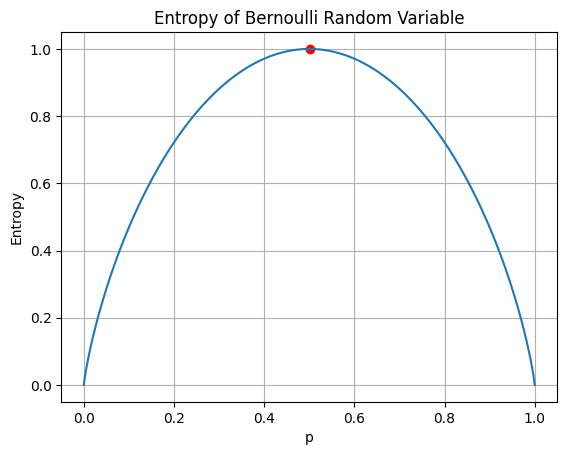

The maximum entropy occurs at p = 0.50


In [75]:
def bern_entropy(p):
    return entropy([p, 1-p])

p_values = np.linspace(0, 1, 1000)

entropy_values = [bern_entropy(p) for p in p_values]

max_entropy_idx = np.argmax(entropy_values)
max_entropy_p = p_values[max_entropy_idx]


plt.plot(p_values, entropy_values, label='Entropy')
plt.scatter(max_entropy_p, entropy_values[max_entropy_idx], color='red', label='Maximum Entropy')
plt.xlabel('p')
plt.ylabel('Entropy')
plt.title('Entropy of Bernoulli Random Variable')
plt.grid(True)
plt.show()

print(f"The maximum entropy occurs at p = {max_entropy_p:.2f}")




4. Image entropy:

# 4(a)

In [76]:
def normalized_histogram(image):

    size = len(image)

    histogram = np.zeros(size)

    for row in image:
        for pixel in row:
            intensity = int(pixel * 255)
            histogram[intensity] += 1

    total_pixels = image.shape[0] * image.shape[1]
    normalized_hist = np.array(histogram) / total_pixels

    return normalized_hist


# 4(b)

In [77]:
image = plt.imread('Clock.png')
histogram = normalized_histogram(image)
image_entropy = entropy(histogram)
print(f"Image entropy: {image_entropy:.4f}")

Image entropy: 6.7057


In [78]:
image = plt.imread('Moon surface.png')
histogram = normalized_histogram(image)
image_entropy = entropy(histogram)
print(f"Image entropy: {image_entropy:.4f}")

Image entropy: 6.7093


In [79]:
image = plt.imread('Male.png')
histogram = normalized_histogram(image)
image_entropy = entropy(histogram)
print(f"Image entropy: {image_entropy:.4f}")

Image entropy: 7.5237


Images with higher entropy typically have more complex and varied pixel intensities, while images with lower entropy tend to be more uniform or have fewer distinct pixel values.


5. Joint PMF and joint entropy

# 5(a)

In [80]:
def normalized_joint_histogram(left, right):
  joint_histogram = np.zeros((256, 256))

  for left_pixel, right_pixel in zip(left.flat, right.flat):
    left_intensity = int(left_pixel*255)
    right_intensity = int(right_pixel*255)
    joint_histogram[left_intensity, right_intensity] += 1

  total_pixels = left.shape[0]*left.shape[1]
  normalised_histo = joint_histogram/total_pixels

  plt.imshow(normalised_histo, cmap='viridis', origin='lower', extent=[0, 255, 0, 255])
  plt.colorbar(label='Normalized Frequency')
  plt.xlabel('Right Image Pixel Intensity')
  plt.ylabel('Left Image Pixel Intensity')
  plt.title('Normalized Joint Histogram of Stereo Image Pair')
  plt.show()

  return normalised_histo


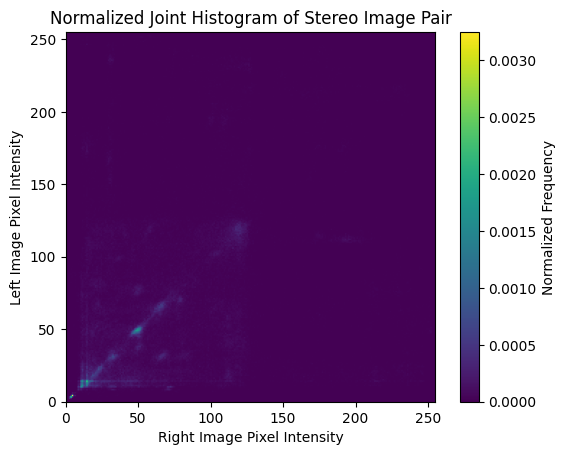

In [81]:
left_image = plt.imread('left.png')
right_image = plt.imread('right.png')

joint_histogram = normalized_joint_histogram(left_image, right_image)

# 5(b)

In [82]:
def joint_entropy(joint_pmf):
    entropy_val = 0

    for p in joint_pmf.flat:
        if p > 0:
            entropy_val += p * np.log2(p)

    return -entropy_val

# 5(c)

In [83]:
test = joint_histogram

joint_entropy(test)

13.675203263376206

6. Conditional PMF and conditional entropy:

# 6(a)

In [84]:
def conditional_pmf(joint_pmf, rv_index, rv_value):
    conditional_pmf = np.zeros_like(joint_pmf)

    for i in range(joint_pmf.shape[0]):
        for j in range(joint_pmf.shape[1]):
            if j == rv_value:
                conditional_pmf[i, j] = joint_pmf[i, j] / np.sum(joint_pmf[i, :])

    return conditional_pmf


# 6(b)

In [85]:
def conditional_entropy(joint_pmf, rv_index):
    conditional_entropy_val = 0

    for i in range(joint_pmf.shape[0]):
        marginal_sum = np.sum(joint_pmf[i, :])
        for j in range(joint_pmf.shape[1]):
            if marginal_sum > 0 and joint_pmf[i, j] > 0:
                conditional_entropy_val -= joint_pmf[i, j] * np.log2(joint_pmf[i, j] / marginal_sum)

    return conditional_entropy_val

# 6(c)

In [86]:
test = joint_histogram

conditional_entropy(test, 0)

6.416909158632463


7. KL divergence:

# 7(a)

In [87]:
def kl_divergence(pmf_p, pmf_q):
    divergence = 0

    for p, q in zip(pmf_p, pmf_q):
        if 1 >p > 0 and 1 > q > 0 :
            divergence += p * np.log2(p / q)

    return divergence

# 7(b)i

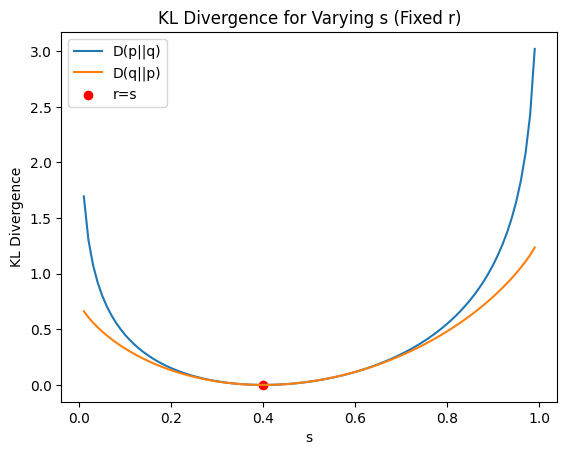

In [88]:
def bernoulli_pmf(x):
  return np.array([x, 1-x])

r = 0.4 # Fixed value of r

# Vary s from 0 to 1
s_values = np.arange(0.01, 1, 0.01)
kl_divergence_pq = []
kl_divergence_qp = []

for s in s_values:
    pmf_p = bernoulli_pmf(r)
    pmf_q = bernoulli_pmf(s)

    kl_pq = kl_divergence(pmf_p, pmf_q)
    kl_qp = kl_divergence(pmf_q, pmf_p)

    kl_divergence_pq.append(kl_pq)
    kl_divergence_qp.append(kl_qp)

plt.plot(s_values, kl_divergence_pq, label='D(p||q)')
plt.plot(s_values, kl_divergence_qp, label='D(q||p)')
plt.scatter([r], [0], color='red', marker='o', label='r=s')
plt.xlabel('s')
plt.ylabel('KL Divergence')
plt.title('KL Divergence for Varying s (Fixed r)')
plt.legend()
plt.show()

# 7(b)ii

In [89]:
print(kl_divergence_pq)
print(kl_divergence_qp)

[1.6952916232722903, 1.3040796888509314, 1.078972889719317, 0.9219280948873624, 0.8022209923665427, 0.7061672840250113, 0.6264683398321957, 0.5587684216858482, 0.5002588106239134, 0.4490224995673065, 0.4036928892852986, 0.36326162384921534, 0.3269636105543822, 0.29420477367575576, 0.2645147953940276, 0.23751514165279997, 0.21289680001176559, 0.19040439197228082, 0.16982458821184698, 0.15097750043269362, 0.1337101773022901, 0.11789161654778818, 0.10340888848031005, 0.09016408696544226, 0.07807190511263762, 0.06705768868624928, 0.057055859126658254, 0.04800862563162703, 0.03986492556621793, 0.03257954690966891, 0.02611239709840471, 0.020427890569852503, 0.015494433302011279, 0.011283987204848342, 0.007771700724996805, 0.004935594743131121, 0.0027562949685262517, 0.0012168037104966292, 0.0003023052374250129, 0.0, 0.000298963855717772, 0.0011900291320086874, 0.002665684940371886, 0.004719994630574709, 0.007348528673390378, 0.010548311599169621, 0.014317781911081573, 0.01865676414693815, 0.

We can observe from the above values that the values are non-negative

# 7(b)iii

In [90]:
print(kl_divergence_pq[39])
print(kl_divergence_qp[39])

0.0
0.0


We can see from the above values(ii) and the plot in (i) that D(p||q) ≠ D(q||p) and are both equal to zero only when r = s(in this case both of them are equal to 0.4)

# 7(b)iv

In [91]:
p = normalized_histogram(plt.imread('left.png'))
q = normalized_histogram(plt.imread('right.png'))

print(kl_divergence(p, q))
print(kl_divergence(q, p))

0.015104015237387055
0.014409785833354494


In this case it is a good metric as the values are close and near to zero which implies that they are very similar to eachother.

In general, KL divergence measures the difference between two probability distributions, so it can provide some insight into the dissimilarity between the histograms of two images. However, whether it's a good metric for image similarity depends on factors like the nature of the images, the specific features being compared, and the desired level of sensitivity to differences.
